### Taller 1.4 
Andrea Sofía Daza (202122293)

Problema A

![Alt text](image-2.png)

1. Suponga que no hay fricción contra el piso. Escriba el modelo del sistema utilizando la
representación en espacio de estados.

In [4]:
def funcion_ss(x,t):
    k = 1 #constante de elasticidad
    m = 1 #masa (kg)
    x1 = x[0]
    x2 = x[1]
    xdot1 = x2
    xdot2 = -k*x1/m 
    xdot = [xdot1,xdot2]
    return xdot

funcion_ss([1,0],0)

[0, -1.0]

2. Grafique la trayectoria del bloque si en el estado inicial está desplazado +3 en x y se
libera de esta posición.

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

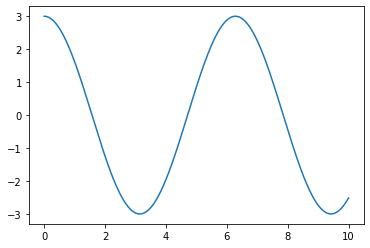

In [5]:
#Soltamos desde el reposo, empezando en 0
tt = np.linspace(0,10,1000)
odeint(funcion_ss,[0,0],tt)
xx = odeint(funcion_ss,[3,0], tt)

plt.plot(tt,xx[:,0])


3. Suponga que hay un coeficiente de fricción dinámica mu=0.02 contra el piso. Realice el
punto 1 y 2 para esta condición.

![Alt text](image-6.png)

In [22]:
def funcion_ss_fd(x,t): #fricción dinámica
    k = 1
    m = 1
    g = 9.81 #gravedad
    u_din = 0.02 #coeficiente de fricción dinámica
    N = m*g #fuerza normal
    x1 = x[0]
    x2 = x[1]
    xdot1 = x2
    xdot2 = (-k*x1+u_din*N)/m 
    xdot = [xdot1,xdot2]
    return xdot

funcion_ss_fd([1,0],0)

[0, -0.8038]

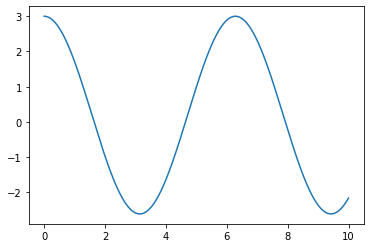

In [28]:
tt = np.linspace(0,10,1000)
odeint(funcion_ss_fd,[0,0],tt)
xx_1 = odeint(funcion_ss_fd,[3,0], tt)

plt.plot(tt,xx_1[:,0])

4. Suponga que además hay un coeficiente de fricción estática mu=0.2 contra el piso.
Realice el punto 1 y 2 para esta condición.

![Alt text](image-7.png)

In [29]:
def funcion_ss_fs(x,t): #fricción estática
    k = 1
    m = 1
    g = 9.81 #gravedad
    u_est = 0.2 #coeficiente de fricción estática
    N = m*g #fuerza normal
    x1 = x[0]
    x2 = x[1]
    xdot1 = x2
    xdot2 = (-k*x1+u_est*N)/m 
    xdot = [xdot1,xdot2]
    return xdot

funcion_ss_fs([1,0],0)

[0, 0.9620000000000002]

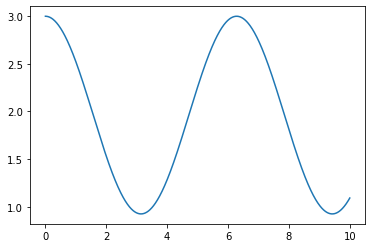

In [30]:
tt = np.linspace(0,10,1000)
odeint(funcion_ss_fs,[0,0],tt)
xx_2 = odeint(funcion_ss_fs,[3,0], tt)

plt.plot(tt,xx_2[:,0])

Problema b. Péndulo Simple

![Alt text](image-5.png)

1. Escriba el modelo del sistema utilizando la representación en espacio de estados. 
Ayuda:
observe la cinemática del problema en coordenadas polares y note las componentes de
aceleración obtenidas, relacione estas aceleraciones con las fuerzas sobre la esfera.

In [4]:
def funcion_ps(theta,t):
    g = 9.81 #gravedad
    m = 1 #masa (kg)
    #theta_f = np.deg2rad(45)
    r = 1 #radio
    x1 = theta[0]
    x2 = theta[1]
    xdot1 = x2
    xdot2 = g*np.sin(np.deg2rad(x1))/r
    xdot = [xdot1,xdot2]
    return xdot

funcion_ps([45,0.1],0)

[0.1, 6.9367175234400325]

2. Grafique la trayectoria del péndulo si en el estado inicial se libera con una inclinación de 45°
(cw) y se libera de esta posición con una velocidad inicial de 0.1m/s.

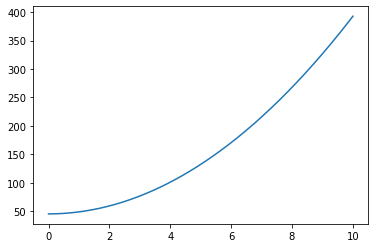

In [12]:
tt = np.linspace(0,10,1000)
odeint(funcion_ps,[0,0],tt)
xx_3 = odeint(funcion_ps,[45,0.1], tt)

plt.plot(tt,xx_3[:,0])

3. Suponga que hay una fricción proporcional al cuadrado de la velocidad tangencial (asigne
un valor arbitrario para la constante de proporcionalidad). Realice nuevamente el punto 1 y 2
con esta consideración.

In [20]:
def funcion_ps_fric(theta,t):
    g = 9.81 #gravedad
    m = 1 #masa (kg)
    theta_f = np.deg2rad(45) #pasar de grados a radianes
    k_p = 0.1 #constante de proporcionalidad (elegido arbitrariamente)
    r = 1 #radio
    x1 = theta[0]
    x2 = theta[1]
    xdot1 = x2
    xdot2 = (g*np.sin(theta_f)/r)-(k_p*(x2*r)**2/m)
    xdot = [xdot1,xdot2]
    return xdot

funcion_ps_fric([45,0.1],0)

[0.1, 6.935717523440032]

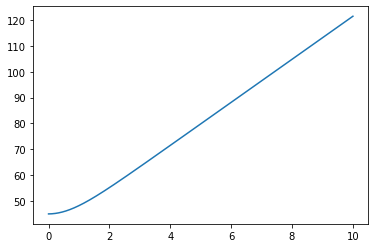

In [21]:
tt = np.linspace(0,10,1000)
odeint(funcion_ps_fric,[0,0],tt)
xx_4 = odeint(funcion_ps_fric,[45,0.1], tt)

plt.plot(tt,xx_4[:,0])